# OptiMask: A Python Package for Computing Optimal Masks in Matrix NaN Data Removal

Introducing OptiMask, a comprehensive Python package designed to facilitate the seamless computation of optimal masks for efficient removal of NaN (Not-a-Number) data from matrices. The core principle behind OptiMask is to generate masks that result in processed matrices devoid of NaN values while retaining the maximum number of non-NaN cells from the original input matrix.

Key Features:
- **Efficient Mask Computation:** OptiMask streamlines the process of deriving masks that are optimized for NaN data elimination.
- **NaN Data Removal:** The package enables users to effortlessly generate processed submatrices by excluding NaN values, ensuring data integrity and reliability.
- **Maximized Data Retention:** OptiMask's algorithm focuses on preserving the highest count of non-NaN cells within the processed matrix.
- **User-Friendly Interface:** With its Python-based interface, OptiMask is designed to be intuitive and user-friendly, catering to both beginners and experienced programmers.

Experience the convenience of NaN data removal with unparalleled efficiency and accuracy using OptiMask.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from optimask import OptiMask

In [2]:
def plot(data):
    plt.pcolormesh(data, cmap='Spectral_r')
    plt.gca().axis('off')
    plt.gca().set_aspect('equal')
    plt.show()

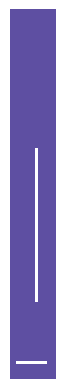

In [4]:
m, n = 120, 15

data = np.zeros((m, n))
data[5, 2:12] = np.nan
data[25:75, 8] = np.nan

plot(data)

In [10]:
%time rows, cols = OptiMask.solve(data)
rows, cols

CPU times: total: 0 ns
Wall time: 2 ms


(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14],
       dtype=int64))

As we can see, the algorithm has removed one row and one columns :

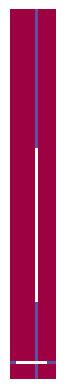

In [9]:
data_processed = data.copy()
data_processed[rows] += 1
data_processed[:, cols] += 1

plot(data_processed)

In [12]:
df = pd.DataFrame(data, columns=[f'feature {k+1}' for k in range(n)], index=pd.date_range(start='2023-08-1', periods=m, freq='H'))
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15
2023-08-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-05 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-05 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-05 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
processed_df = OptiMask.solve(df, re)